In [30]:
#Load the libraries
!pip install ta
!pip install yfinance
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date 
from datetime import timedelta
from dateutil import relativedelta
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import *
import yfinance as yf
from ta.momentum import RSIIndicator
from ta.volatility import AverageTrueRange
from ta.trend import macd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss 
from sklearn.metrics import roc_auc_score

In [217]:
class load_data:
  def __init__(self,stk_name,country,from_date,to_date):
    self.stk_name = stk_name
    self.country = country
    self.from_date = from_date
    self.to_date = to_date

  def get_data(self):
    data_df =  yf.download(self.stk_name, start=self.from_date, end=self.to_date)
    self.data_df = data_df

  def get_indicators(self):
    rsi_14 = RSIIndicator(close = self.data_df['Close'], window = 14)
    self.data_df["RSI_14"] = rsi_14.rsi()
    volatility = AverageTrueRange(high = self.data_df['High'], low = self.data_df['Low'], close = self.data_df['Close'], window = 14)
    self.data_df["Avg_True_Range"] = volatility.average_true_range() 
    self.data_df["MACD"] = macd(self.data_df['Close'], window_slow = 26, window_fast = 12)
    self.data_df["Moving_avg_10"] = self.data_df['Close'].rolling(10).mean()
    # self.data_df["Moving_avg_30"] = self.data_df['Close'].rolling(30).mean()
    # self.data_df["Moving_avg_50"] = self.data_df['Close'].rolling(50).mean()

  def get_returns(self):
    self.data_df['returns'] = (self.data_df['Close'].shift(-10) - self.data_df['Close'])

  def get_labels(self):
    Buy_Sell = []
    for i in range(len(self.data_df)):
      if self.data_df['returns'][i] >0 :
        Buy_Sell.append(1)
      else:
        Buy_Sell.append(-1)
    self.data_df['Buy_Sell'] = Buy_Sell
    print(self.data_df)
    return self.data_df

class ml_models_reg:
  def __init__(self,data_df,X,y):
    self.data_df = data_df
    self.X = X
    self.y = y

  def plot_corr(self):
    print("--------------------------------CORRELATION---------------------------------------")
    mean_corr=self.X.corr()
    g1 = sns.heatmap(mean_corr, cmap='coolwarm', vmin=0, vmax=1)
    g1.set_xticklabels(g1.get_xticklabels(), rotation=70, fontsize=8)
    g1.set_yticklabels(g1.get_yticklabels(), rotation=15, fontsize=8)
    plt.title("Correlation Plot")

  def pca(self,num_comp):
    pca = PCA(n_components=num_comp)
    pca.fit(self.X)
    print(pca.explained_variance_)
    print(pca.singular_values_)
  
  def normalise_data(self):
    scaler = MinMaxScaler()
    self.data_df = scaler.fit_transform(self.data_df)
    self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.y, test_size=0.3,shuffle = False)
  
  def linear_regression(self):
    lin_reg = LinearRegression()
    lin_reg.fit(self.X_train,self.Y_train)
    self.lin_predict= lin_reg.predict(self.X_test)
    self.lin_acc = lin_reg.score(self.X_train,self.Y_train)
    self.lin_mae = mean_absolute_error(self.Y_test,self.lin_predict)
    self.lin_mse = mean_squared_error(self.Y_test,self.lin_predict)

  def ridge_regression(self):
    ridge_reg = linear_model.Ridge()
    ridge_reg.fit(self.X_train,self.Y_train)
    self.ridge_predict= ridge_reg.predict(self.X_test)
    self.ridge_acc =  ridge_reg.score(self.X_train,self.Y_train)
    self.ridge_mae = mean_absolute_error(self.Y_test,self.ridge_predict)
    self.ridge_mse = mean_squared_error(self.Y_test,self.ridge_predict)
  
  def knn_regression(self,n_neighbors=5):
    knn_reg = neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
    knn_reg.fit(self.X_train,self.Y_train)
    self.knn_predict= knn_reg.predict(self.X_test)
    self.knn_acc =  knn_reg.score(self.X_train,self.Y_train)
    self.knn_mae = mean_absolute_error(self.Y_test,self.knn_predict)
    self.knn_mse = mean_squared_error(self.Y_test,self.knn_predict)
  
  def bayesian_regression(self):
    bayes_reg = linear_model.BayesianRidge()
    bayes_reg.fit(self.X_train,self.Y_train)
    self.bayes_predict= bayes_reg.predict(self.X_test)
    self.bayes_acc =  bayes_reg.score(self.X_train,self.Y_train)
    self.bayes_mae = mean_absolute_error(self.Y_test,self.bayes_predict)
    self.bayes_mse = mean_squared_error(self.Y_test,self.bayes_predict)
  
  def sv_regression(self):
    svm_reg = svm.SVR()
    svm_reg.fit(self.X_train,self.Y_train)
    self.svm_predict = svm_reg.predict(self.X_test)
    self.svm_acc =  svm_reg.score(self.X_train,self.Y_train)
    self.svm_mae = mean_absolute_error(self.Y_test,self.svm_predict)
    self.svm_mse = mean_squared_error(self.Y_test,self.svm_predict)

  def plot_test_pred(self):
    plt.figure(figsize=(17,8))
    plt.plot(self.Y_test.values[-250:], label = 'Test' ,alpha=0.35, color='blue')
    plt.plot(self.lin_predict[-250:], label = 'Pred_Lin' ,alpha=0.35, color='orange')
    plt.plot(self.ridge_predict[-250:], label = 'Pred_Ridge' ,alpha=0.35, color='green')
    plt.plot(self.knn_predict[-250:], label = 'Pred_Knn' ,alpha=0.35, color='red')
    plt.plot(self.bayes_predict[-250:], label = 'Pred_Bayesian' ,alpha=0.35, color='black')
    plt.plot(self.svm_predict[-250:], label = 'Pred_SVR' ,alpha=0.35, color='purple')
    plt.title('Test'+ "-" + 'Pred')
    plt.legend(loc='upper left')
    plt.show()

  def plot_metrics(self):
    print("--------------------------------METRICS : R2---------------------------------------",end='\n')   
    plt.figure(figsize=(8,4))
    algo = ['Linear Regression' , 'Ridge Regression', 'KNN Regression', 'Bayesian Ridge Regression', 'Support Vector Regression']
    accuracy = [self.lin_acc,self.ridge_acc,self.knn_acc,self.bayes_acc,self.svm_acc]
    y_pos = np.arange(len(algo))
    plt.bar(y_pos,accuracy)
    plt.xticks(y_pos,algo)
    plt.xticks(rotation=90)
    plt.ylabel('R2 Score')
    plt.show()

    print("--------------------------------METRICS : MAE---------------------------------------")
    plt.figure(figsize=(8,4))
    mae = [self.lin_mae,self.ridge_mae,self.knn_mae,self.bayes_mae,self.svm_mae]
    y_pos = np.arange(len(algo))
    plt.bar(y_pos,mae)
    plt.xticks(y_pos,algo)
    plt.xticks(rotation=90)
    plt.ylabel('Mean Absolute Error')
    plt.show()

    print("--------------------------------METRICS : MSE---------------------------------------")
    plt.figure(figsize=(8,4))
    mse = [self.lin_mse,self.ridge_mse,self.knn_mse,self.bayes_mse,self.svm_mse]
    y_pos = np.arange(len(algo))
    plt.bar(y_pos,mse)
    plt.xticks(y_pos,algo)
    plt.xticks(rotation=90)
    plt.ylabel('Mean Squared Error')
    plt.show()
  
  def get_returns(self):
    ret = pd.DataFrame()
    ret['Test'] =self.Y_test
    ret['Pred'] = self.knn_predict
    # ret.columns = ['Test','Predict']
    print(ret.tail(100))
    rslt_df_test = ret[ret['Test'] > 0]
    rslt_df_pred = ret[ret['Pred'] > 0]
    print(rslt_df_test)
    print(rslt_df_pred)
    avg_test_ret = rslt_df_test['Test'].sum(axis = 0, skipna = True) / len(rslt_df_test)
    avg_pred_ret = rslt_df_pred['Pred'].sum(axis = 0, skipna = True) / len(rslt_df_pred)
    print(avg_test_ret)
    print(avg_pred_ret)

class ml_models_class:
  def __init__(self,data_df,X,y):
    self.data_df = data_df
    self.X = X
    self.y = y

  def pca(self,num_comp):
    pca = PCA(n_components=num_comp)
    pca.fit(self.X)
    print(pca.explained_variance_)
    print(pca.singular_values_)
  
  def normalise_data(self):
    scaler = MinMaxScaler()
    self.data_df = scaler.fit_transform(self.data_df)
    self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.y, test_size=0.3, shuffle = False)

  def logit_regression(self):
    logit_reg = LogisticRegression()
    logit_reg.fit(self.X_train,self.Y_train)
    self.logit_predict= logit_reg.predict(self.X_test)
    self.logit_acc = accuracy_score(self.Y_test,self.logit_predict)
    self.logit_f1 = f1_score(self.Y_test,self.logit_predict)
    self.logit_log_loss = log_loss(self.Y_test,self.logit_predict)
    self.logit_roc_auc = roc_auc_score(self.Y_test,self.logit_predict)

  def svc_classification(self):
    svc_class = svm.SVC(kernel='rbf',decision_function_shape='ovo')
    svc_class.fit(self.X_train,self.Y_train)
    self.svc_predict= svc_class.predict(self.X_test)
    self.svc_acc = accuracy_score(self.Y_test,self.svc_predict)
    self.svc_f1 = f1_score(self.Y_test,self.svc_predict)
    self.svc_log_loss = log_loss(self.Y_test,self.svc_predict)
    self.svc_roc_auc = roc_auc_score(self.Y_test,self.svc_predict)

  def knn_classification(self,n_neigh=5):
    knn_class = KNeighborsClassifier(n_neighbors =n_neigh)
    knn_class.fit(self.X_train,self.Y_train)
    self.knn_predict= knn_class.predict(self.X_test)
    self.knn_acc = accuracy_score(self.Y_test,self.knn_predict)
    self.knn_f1 = f1_score(self.Y_test,self.knn_predict)
    self.knn_log_loss = log_loss(self.Y_test,self.knn_predict)
    self.knn_roc_auc = roc_auc_score(self.Y_test,self.knn_predict)

  def plot_test_pred(self):
    plt.figure(figsize=(17,8))
    y= pd.DataFrame(self.Y_test.values[-150:]).set_index(self.Y_test.values[-150:].index)
    plt.plot(y, label = 'Test' ,alpha=0.35, color='blue')
    plt.plot(self.logit_predict[-150:], label = 'Pred_Logit' ,alpha=0.35, color='orange')
    plt.plot(self.svc_predict[-150:], label = 'Pred_SVC' ,alpha=0.35, color='green')
    plt.plot(self.knn_predict[-150:], label = 'Pred_KNN' ,alpha=0.35, color='green')
    plt.title('Test'+ "-" + 'Pred')
    plt.legend(loc='upper left')
    plt.show()


  def plot_metrics(self):
    print("--------------------------------METRICS : ACCURACY---------------------------------------",end='\n')   
    plt.figure(figsize=(8,4))
    algo = ['Logistic Regression' , 'Support Vector Classification' , 'KNN Classification']
    accuracy = [self.logit_acc, self.svc_acc ,self.knn_acc]
    y_pos = np.arange(len(algo))
    plt.bar(y_pos,accuracy)
    plt.xticks(y_pos,algo)
    plt.xticks(rotation=90)
    plt.ylabel('Accuracy')
    plt.show()

    print("--------------------------------METRICS : F1---------------------------------------")
    plt.figure(figsize=(8,4))
    F1 = [self.logit_f1, self.svc_f1 ,self.knn_f1]
    y_pos = np.arange(len(algo))
    plt.bar(y_pos,F1)
    plt.xticks(y_pos,algo)
    plt.xticks(rotation=90)
    plt.ylabel('F1')
    plt.show()

    print("--------------------------------METRICS : Log Loss---------------------------------------")
    plt.figure(figsize=(8,4))
    los_loss = [self.logit_log_loss, self.svc_log_loss ,self.knn_log_loss]
    y_pos = np.arange(len(algo))
    plt.bar(y_pos,los_loss)
    plt.xticks(y_pos,algo)
    plt.xticks(rotation=90)
    plt.ylabel('Log Loss')
    plt.show()

    print("--------------------------------METRICS : ROC AUC---------------------------------------")
    plt.figure(figsize=(8,4))
    roc_auc = [self.logit_roc_auc, self.svc_roc_auc ,self.knn_roc_auc]
    y_pos = np.arange(len(algo))
    plt.bar(y_pos,roc_auc)
    plt.xticks(y_pos,algo)
    plt.xticks(rotation=90)
    plt.ylabel('ROC AUC')
    plt.show()

  def get_returns(self,data_df ,amt = 100000):
    print(self.X_test)
    index = self.X_test.index
    price = list(data_df['Close'])[-len(self.X_test):]
    print(self.Y_test,self.logit_predict)
    self.actual_ret = []
    self.predict_ret = []
    trigger = 0
    Buy_Sig_Test = []
    Sell_Sig_Test = []
    for i in range(len(self.Y_test)):
      if self.Y_test[i] > 0 and trigger != 1:
        Buy_Sig_Test.append(price[i])
        Sell_Sig_Test.append(np.nan)
        trigger = 1 
      elif self.Y_test[i] < 0 and trigger != 0:
        Buy_Sig_Test.append(np.nan)
        Sell_Sig_Test.append(price[i])
        trigger = 0
      else:
        Buy_Sig_Test.append(np.nan)
        Sell_Sig_Test.append(np.nan)
    # self.data_df['Buy_Sig_Test'] = Buy_Sig_Test
    # self.data_df['Sell_Sig_Test'] = Sell_Sig_Test

    trigger = 0
    Buy_Sig_svc_predict = []
    Sell_Sig_svc_predict = []
    for i in range(len(self.Y_test)):
      if self.svc_predict[i] > 0 and trigger != 1:
        Buy_Sig_svc_predict.append(price[i])
        Sell_Sig_svc_predict.append(np.nan)
        trigger = 1 
      elif self.svc_predict[i] < 0 and trigger != 0:
        Buy_Sig_svc_predict.append(np.nan)
        Sell_Sig_svc_predict.append(price[i])
        trigger = 0
      else:
        Buy_Sig_svc_predict.append(np.nan)
        Sell_Sig_svc_predict.append(np.nan)
    # self.data_df['Buy_Sig_logit_predict'] = Buy_Sig_logit_predict
    # self.data_df['Sell_Sig_logit_predict'] = Buy_Sig_logit_predict

    return index,price,Buy_Sig_Test,Sell_Sig_Test,Buy_Sig_svc_predict,Buy_Sig_svc_predict,self.svc_predict

class plot:
  def __init__(self,data_df):
    self.data_df = data_df
  def plot_line_cmp(self,col_X,col_y):
    plt.figure(figsize=(17,8))
    plt.plot(self.data_df[col_X], label = col_X ,alpha=0.35, color='blue')
    plt.plot(self.data_df[col_y], label = col_y ,alpha=0.35, color='orange')
    plt.title(col_X+ "-" + col_y)
    plt.legend(loc='upper left')
    plt.show()
  def plot_line(self,col_X):
    plt.figure(figsize=(17,8))
    plt.plot(self.data_df[col_X], label = col_X ,alpha=0.35, color='blue')
    plt.title(col_X)
    plt.legend(loc='upper left')
    plt.show()
  def plot_line_scatter(self,col_X,col_y):
    plt.figure(figsize=(17,8))
    plt.plot(self.data_df[col_X], label = col_X ,alpha=0.35, color='blue')
    plt.scatter(self.data_df.index,self.data_df[col_y], label = col_y ,alpha=0.35, color='orange')
    plt.title(col_X+ "-" + col_y)
    plt.legend(loc='upper left')
    plt.show()
  def plot_buy_sell(self,index,price,buy,sell):
    plt.figure(figsize=(17,8))
    plt.plot(price, label = 'Price' ,alpha=0.35, color='blue')
    plt.scatter(index,buy, label = 'Buy' ,alpha=0.35, color='green', marker = '^')
    plt.scatter(index,sell, label = 'Sell' ,alpha=0.35, color='red', marker = 'v')
    plt.title("Buy"+ "-" + "Sell")
    plt.legend(loc='upper left')
    plt.show()

[*********************100%***********************]  1 of 1 completed
                   Open         High  ...    returns  Buy_Sell
Date                                  ...                     
2017-01-02  1272.000000  1272.000000  ...  39.800049         1
2017-01-03  1218.699951  1222.599976  ...  31.800049         1
2017-01-04  1215.800049  1224.500000  ...  36.950073         1
2017-01-05  1215.699951  1220.400024  ...  25.200073         1
2017-01-06  1219.000000  1232.000000  ...  14.950073         1
...                 ...          ...  ...        ...       ...
2020-02-20  2364.000000  2377.500000  ...        NaN        -1
2020-02-24  2355.000000  2365.199951  ...        NaN        -1
2020-02-25  2309.000000  2320.750000  ...        NaN        -1
2020-02-26  2278.000000  2309.500000  ...        NaN        -1
2020-02-27  2279.800049  2289.600098  ...        NaN        -1

[777 rows x 12 columns]


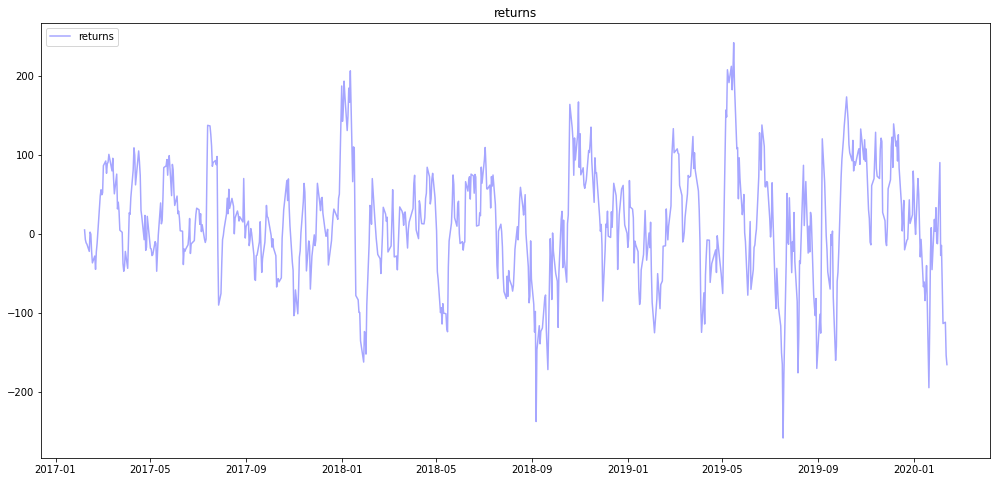

--------------------------------CORRELATION---------------------------------------
--------------------------------METRICS : R2---------------------------------------


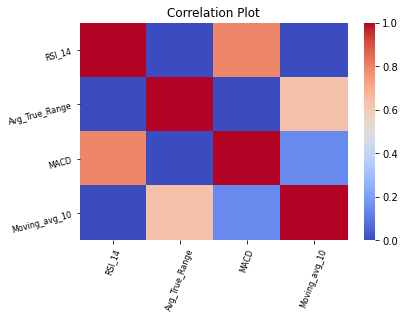

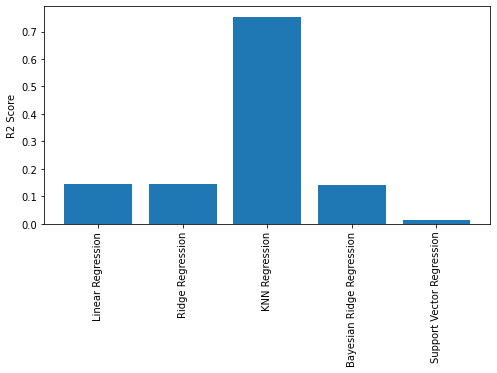

--------------------------------METRICS : MAE---------------------------------------


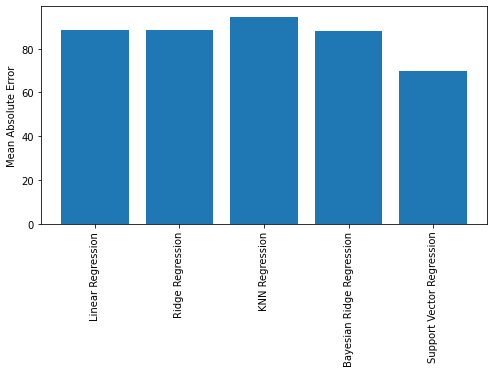

--------------------------------METRICS : MSE---------------------------------------


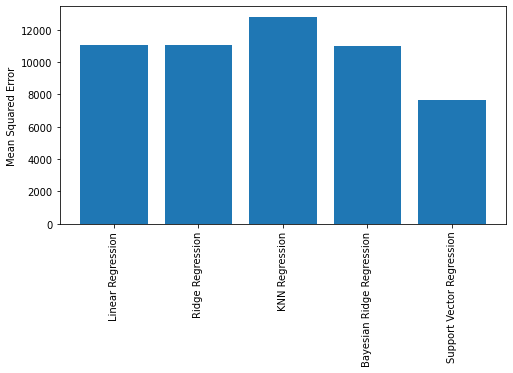

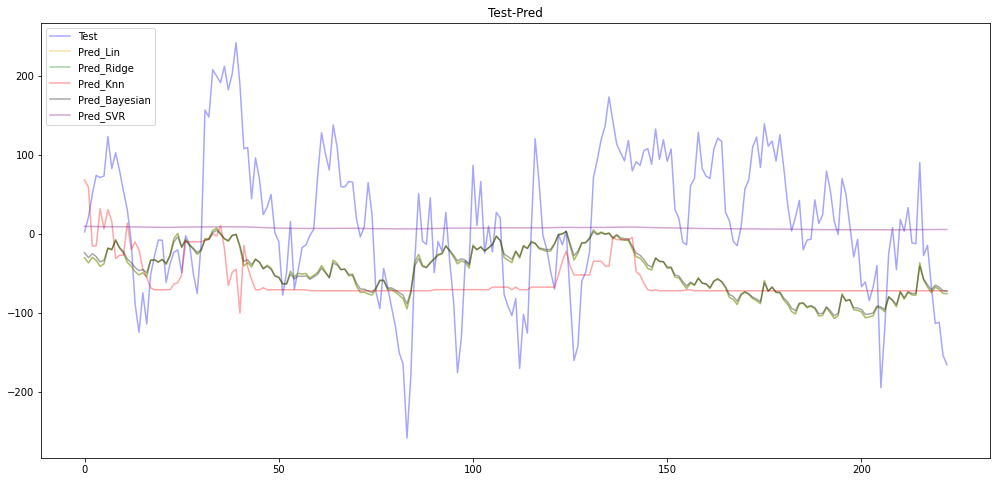

                  Test       Pred
Date                             
2019-09-18  -13.750000 -34.419995
2019-09-19    3.700073 -21.659985
2019-09-20  -80.000000 -40.789990
2019-09-23 -160.000000 -51.849976
2019-09-24 -142.050049 -51.849976
...                ...        ...
2020-02-06  -66.949951 -71.859985
2020-02-07 -113.349854 -71.859985
2020-02-10 -111.699951 -71.859985
2020-02-11 -153.699951 -71.859985
2020-02-12 -165.400146 -71.859985

[100 rows x 2 columns]
                 Test       Pred
Date                            
2019-03-14   2.700073  68.359985
2019-03-15  21.299927  59.249976
2019-03-18  50.699951 -15.419995
2019-03-19  74.200073 -14.979980
2019-03-20  71.649902  32.110010
...               ...        ...
2020-01-23   8.050049 -71.859985
2020-01-27  18.500000 -71.859985
2020-01-28   3.549805 -71.859985
2020-01-29  33.350098 -71.859985
2020-02-03  90.500000 -71.859985

[124 rows x 2 columns]
                  Test       Pred
Date                             
2019-03-14   

In [218]:
data = load_data('hdfc.ns','india',"2017-01-01","2020-02-28")
data_df = data.get_data()
data_df = data.get_indicators()
data_df = data.get_returns()
data_df = (data.get_labels()).dropna()

plot(data_df).plot_line('returns')
model = ml_models_reg(data_df, data_df[data_df.columns[6:-2]] , data_df[data_df.columns[-2]])
model.plot_corr()
model.normalise_data()
model.linear_regression()
model.ridge_regression()
model.knn_regression()
model.bayesian_regression()
model.sv_regression()
model.plot_metrics()
model.plot_test_pred()

model.get_returns()

[*********************100%***********************]  1 of 1 completed
                   Open         High  ...    returns  Buy_Sell
Date                                  ...                     
2017-01-02  1272.000000  1272.000000  ...  39.800049         1
2017-01-03  1218.699951  1222.599976  ...  31.800049         1
2017-01-04  1215.800049  1224.500000  ...  36.950073         1
2017-01-05  1215.699951  1220.400024  ...  25.200073         1
2017-01-06  1219.000000  1232.000000  ...  14.950073         1
...                 ...          ...  ...        ...       ...
2020-02-20  2364.000000  2377.500000  ...        NaN        -1
2020-02-24  2355.000000  2365.199951  ...        NaN        -1
2020-02-25  2309.000000  2320.750000  ...        NaN        -1
2020-02-26  2278.000000  2309.500000  ...        NaN        -1
2020-02-27  2279.800049  2289.600098  ...        NaN        -1

[777 rows x 12 columns]
--------------------------------METRICS : ACCURACY-------------------------------------

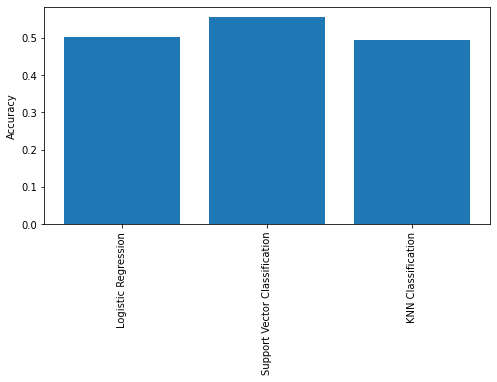

--------------------------------METRICS : F1---------------------------------------


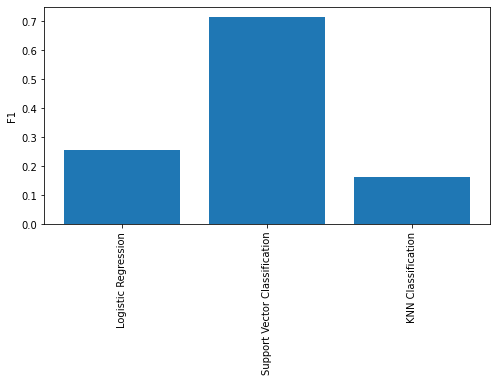

--------------------------------METRICS : Log Loss---------------------------------------


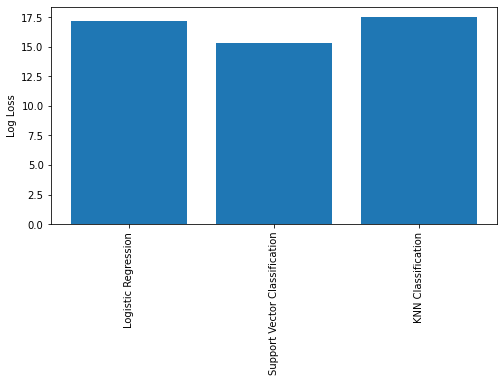

--------------------------------METRICS : ROC AUC---------------------------------------


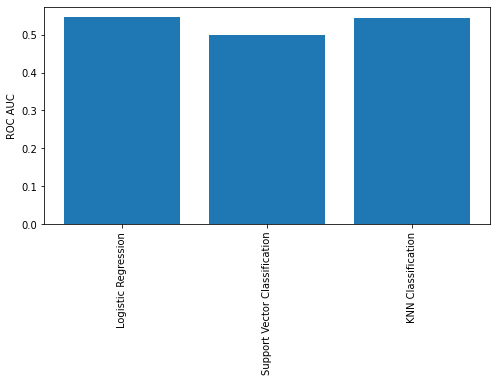

               RSI_14  Avg_True_Range       MACD  Moving_avg_10
Date                                                           
2019-03-14  62.152397       32.130640   0.203979    1894.524988
2019-03-15  65.150885       32.392732   5.610823    1907.869995
2019-03-18  61.518314       33.068249   8.805805    1918.165002
2019-03-19  62.519558       31.881237  11.643399    1928.950000
2019-03-20  65.966631       31.757579  15.305413    1939.185010
...               ...             ...        ...            ...
2020-02-06  53.215928       60.436686  -6.841301    2394.519995
2020-02-07  49.969591       59.973348  -5.857531    2390.009985
2020-02-10  50.875956       58.135966  -4.329978    2391.859985
2020-02-11  53.082282       55.944107  -1.420597    2392.214966
2020-02-12  53.347457       56.169535   1.070479    2395.549976

[223 rows x 4 columns]
Date
2019-03-14    1
2019-03-15    1
2019-03-18    1
2019-03-19    1
2019-03-20    1
             ..
2020-02-06   -1
2020-02-07   -1
2020-02-10 

In [219]:
data = load_data('hdfc.ns','india',"2017-01-01","2020-02-28")
data_df = data.get_data()
data_df = data.get_indicators()
data_df = data.get_returns()
data_df = (data.get_labels()).dropna()
model = ml_models_class(data_df, data_df[data_df.columns[6:-2]] , data_df[data_df.columns[-1]])
model.normalise_data()
model.logit_regression()
model.svc_classification()
model.knn_classification()
model.plot_metrics()
index,Price,Buy_test, Sell_test, Buy_pred, Sell_pred , val= model.get_returns(data_df , 100000)
# plot(data_df).plot_buy_sell(index,Price,Buy_test, Sell_test)
# model.plot_test_pred()

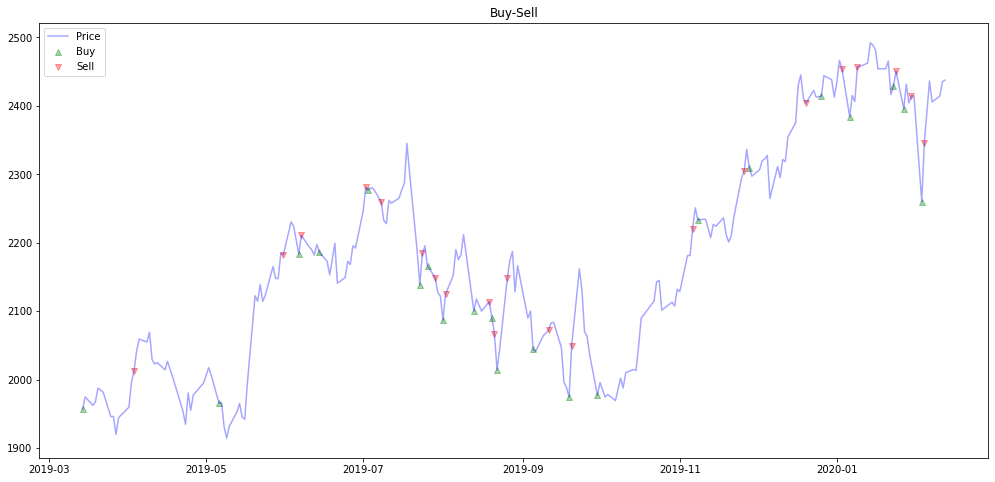

In [221]:
ret = pd.DataFrame(index)
ret['Price'] = Price
ret['Buy_test'] = Buy_test
ret['Sell_test'] = Sell_test
ret['Buy_pred'] = Buy_pred
ret['Sell_pred'] = Sell_pred
plot(data_df).plot_buy_sell(ret['Date'],pd.DataFrame(ret['Price']).set_index(ret['Date']),ret['Buy_test'],ret['Sell_test'])

4 indicators are used, namesly, 14 days RSI, 14 days Volatility, MACD and 10 days EMA. Various classification algorithms are compared to get the best results for buying and selling. Support vector has higher F1 score and Accuracy in prediction. And hence can be used as a strategy better than other classifiers.

Here, Regression algorithms are also compared to predict the future returns. KNN turned out the best to predict with highest R2 score. 
Moreover, other algorithms with other techinical indicators can also be tried and checked for accuracy rate.